#  Contents

01. Importing libraries
02. Importing data
03. Data cleaning
04. Data prep for regression analysis
05. Regression analysis

### 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Allow matplotlib visuals

%matplotlib inline

### 02. Importing data

In [3]:
# Import main folder
path = r'C:\Users\amwil\OneDrive\Career Foundry Project Work\07-2021 ABNB NYC Data Analysis'

In [4]:
# Import AB_NYC_2019_cleaned.csv
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'AB_NYC_2019_Visually_Explored.csv'), index_col = False)

### 03. Data Cleaning

In [5]:
# Check columns
df.columns

Index(['Listing id', 'Host id', 'Borough', 'Neighborhood', 'Latitude',
       'Longitude', 'Room type', 'Price', 'Minimum nights for rent',
       'Number of reviews', 'Last review', 'Reviews per month',
       'Number of listings per host', 'Availability per year',
       'Price category'],
      dtype='object')

In [6]:
# Check first 20 rows of df
df.head(20)

,Listing id,Host id,Borough,Neighborhood,Latitude,Longitude,Room type,Price,Minimum nights for rent,Number of reviews,Last review,Reviews per month,Number of listings per host,Availability per year,Price category
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19,0.210000,6,365,Middle price
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21,0.380000,2,355,High price
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0,2019-06-23,1.373221,1,365,Middle price
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05,4.640000,1,194,Low price
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19,0.100000,1,0,Low price
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74,2019-06-22,0.590000,1,129,High price
6,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,2.0,49,2017-10-05,0.400000,1,0,Low price
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430,2019-06-24,3.470000,1,220,Low price
8,5203,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118,2017-07-21,0.990000,1,0,Low price
9,5238,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160,2019-06-09,1.330000,4,188,Middle price


In [7]:
# Check shape
df.shape

(48895, 15)

In [8]:
# Check for missing values
df.isnull().sum()

Listing id                     0
Host id                        0
Borough                        0
Neighborhood                   0
Latitude                       0
Longitude                      0
Room type                      0
Price                          0
Minimum nights for rent        0
Number of reviews              0
Last review                    0
Reviews per month              0
Number of listings per host    0
Availability per year          0
Price category                 0
dtype: int64

In [9]:
# Check for duplicates
dups = df.duplicated()

In [10]:
# No duplicates found
dups.shape

(48895,)

### 04. Data prep for regression analysis

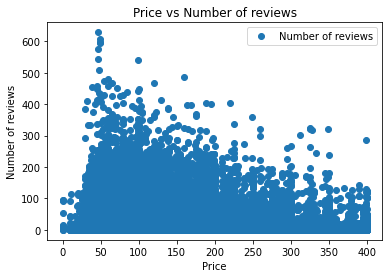

In [11]:
# Create a scatterplot using matplotlib
df.plot(x = 'Price', y='Number of reviews',style='o')
plt.title('Price vs Number of reviews')  
plt.xlabel('Price')  
plt.ylabel('Number of reviews')  
plt.show()

Q5. State your hypothesis in a markdown cell within your Jupyter notebook.
If a listing's price is less than 200 dollars, then the listing will have more reviews.

In [12]:
# Reshape the variables into NumPy arrays
X = df['Price'].values.reshape(-1,1)
y = df['Number of reviews'].values.reshape(-1,1)

In [13]:
X

array([[149.],
       [225.],
       [150.],
       ...,
       [115.],
       [ 55.],
       [ 90.]])

In [14]:
y

array([[ 9],
       [45],
       [ 0],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=int64)

In [15]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 05. Regression Analysis

In [16]:
# Create a regression object
regression = LinearRegression()

In [17]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

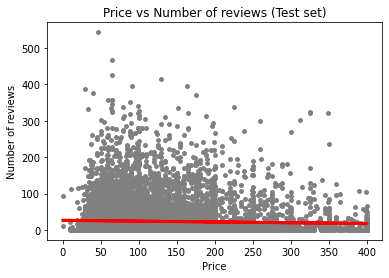

In [19]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Number of reviews (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Number of reviews')
plot_test.show()

#Q10. Write your own interpretation of how well the line appears to fit the data in a markdown cell. My interpretation is that the line does not fit the test model very well. There are quite a few listings with prices over 200 dollars above the line. This contradicts my hypothesis that listings with a price of less than 200 dollars will have more reviews. My statement is only partially true.

In [20]:
# Create model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [21]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02191626]]
Mean squared error:  1862.1581852982017
R2 score:  0.0011738251118844634


In [22]:
y_predicted

array([[21.39672799],
       [24.13626098],
       [19.7530082 ],
       ...,
       [21.96655085],
       [23.04044778],
       [22.16379723]])

In [23]:
# Compare the predicted y values and the actual y values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,21.396728
1,5,24.136261
2,5,19.753008
3,13,25.758065
4,4,23.588354
5,1,25.253990
6,156,24.136261
7,14,22.492541
8,0,24.465005
9,118,24.793749


#Q13. Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias. The model did not do a good job of explaining the relationship between price and the number of reviews. The relationship simply doesn’t follow a single, straight regression line; therefore, a single, straight regression line won’t be able to accurately predict anything. There is still a lot of variance in the data that can’t be explained by the linear relationship between the variables. As for bias, the number of reviews is likely affected by collection bias. The number of reviews is completely reliant on unevaluated sources volunteering their opinions. Thus, the number of reviews collected may not be representative of the number of guests who had stayed at the rentals.